In [1]:
# PATHS
DATA_TRAIN_PATH = "./../data/raw/train.csv"
DATA_TEST_PATH = "./../data/raw/test.csv" 
OUTPUT_PATH = './../results/predictions/oct2_paola.csv'

In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./../src/')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from implementations import *
from utils import *
from pipeline import * 
from proj1_helpers import * 

In [4]:
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [5]:
print(y.shape)
print(tX.shape)
print(ids.shape)

(250000,)
(250000, 30)
(250000,)


In [6]:
len(tX[:,22])

250000

In [7]:
inds = np.where(tX[:,22]==0)
tX1 = tX[inds] 
y1 = y[inds]

print(y1.shape)
print(tX1.shape)

(99913,)
(99913, 30)


In [8]:
sum(tX1[:,22])

0.0

In [9]:
tX_test,tX_train, y_train, y_test = split_data(tX1, y1, 0.1, myseed=1)
print(tX_train.shape)
print(tX_test.shape)

(89922, 30)
(9991, 30)


In [10]:
sum(tX_test[:,22])

0.0

In [11]:
sum(tX_train[:,22])

0.0

In [363]:
print(tX_train)
print(tX_test)

[[ 136.913   63.748   85.951 ... -999.    -999.       0.   ]
 [ 159.462   80.405  119.097 ... -999.    -999.       0.   ]
 [ 184.4     78.15   137.695 ... -999.    -999.       0.   ]
 ...
 [-999.     120.753   75.769 ... -999.    -999.       0.   ]
 [  76.375   52.105   63.356 ... -999.    -999.       0.   ]
 [  99.464   18.05    62.568 ... -999.    -999.       0.   ]]
[[ 117.325    6.402   83.105 ... -999.    -999.       0.   ]
 [ 262.778   81.156  151.688 ... -999.    -999.       0.   ]
 [-999.      71.33    53.402 ... -999.    -999.       0.   ]
 ...
 [  97.921   57.882   73.421 ... -999.    -999.       0.   ]
 [ 151.648    3.506   96.321 ... -999.    -999.       0.   ]
 [ 115.168   52.109   93.168 ... -999.    -999.       0.   ]]


In [364]:
tX_train = np.where(tX_train == -999, np.NaN, tX_train)
tX_test = np.where(tX_test == -999, np.NaN, tX_test)

In [365]:
print(tX_train)
print(tX_test)

[[136.913  63.748  85.951 ...     nan     nan   0.   ]
 [159.462  80.405 119.097 ...     nan     nan   0.   ]
 [184.4    78.15  137.695 ...     nan     nan   0.   ]
 ...
 [    nan 120.753  75.769 ...     nan     nan   0.   ]
 [ 76.375  52.105  63.356 ...     nan     nan   0.   ]
 [ 99.464  18.05   62.568 ...     nan     nan   0.   ]]
[[117.325   6.402  83.105 ...     nan     nan   0.   ]
 [262.778  81.156 151.688 ...     nan     nan   0.   ]
 [    nan  71.33   53.402 ...     nan     nan   0.   ]
 ...
 [ 97.921  57.882  73.421 ...     nan     nan   0.   ]
 [151.648   3.506  96.321 ...     nan     nan   0.   ]
 [115.168  52.109  93.168 ...     nan     nan   0.   ]]


{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb080792b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb07c49c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb07cae610>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcb07c49820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb07c4e5e0>],
 'means': []}

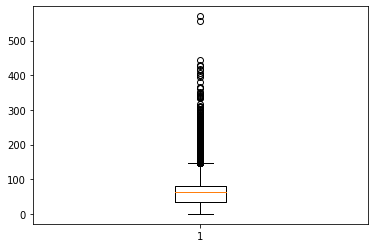

In [366]:
plt.boxplot(tX_train[:,1])

In [367]:
# Delete columns with no std: meaning they are constants
col_std = np.nanstd(tX_train, axis=0)
print(col_std)
print(col_std.shape)

[51.7412369  32.03604052 38.15808953 16.92445208         nan         nan
         nan  0.69313342 16.92445204 23.66323135  0.58121085  0.93840024
         nan 15.28909605  1.23272496  1.8175161  14.61098366  1.31008107
  1.81697987 20.54405454  1.81198349 53.19052523  0.                 nan
         nan         nan         nan         nan         nan  0.        ]
(30,)


/usr/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [368]:
constant_ind = np.where(col_std==0)[0]
constant_ind

array([22, 29])

In [369]:
constant_ind = np.where(col_std==0)[0]
tX_train = np.delete(tX_train, constant_ind, axis=1)
tX_test  = np.delete(tX_test, constant_ind, axis=1)
col_std = np.delete(col_std, constant_ind, axis=0)

print(tX_train.shape)
print(tX_test.shape)
print(col_std)
print(col_std.shape)

(89922, 28)
(9991, 28)
[0.9398822  0.68248862 0.44528687 0.66640474]
[51.7412369  32.03604052 38.15808953 16.92445208         nan         nan
         nan  0.69313342 16.92445204 23.66323135  0.58121085  0.93840024
         nan 15.28909605  1.23272496  1.8175161  14.61098366  1.31008107
  1.81697987 20.54405454  1.81198349 53.19052523         nan         nan
         nan         nan         nan         nan]
(28,)


In [370]:
print(tX_train.shape)

(89922, 28)


In [371]:
tX_train = tX_train[:,~np.all(np.isnan(tX_train), axis=0)]

In [372]:
print(tX_train.shape)

(89922, 18)


In [314]:
import pandas as pd
pd.DataFrame(tX_train).isna().sum()

0     23510
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
dtype: int64

In [315]:
# Robust standarization and outliers treatment
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
q1= np.nanpercentile(tX_train, q = 25, axis=0)
median =  np.nanpercentile(tX_train, q = 50, axis=0)
q3 =  np.nanpercentile(tX_train, q = 75, axis=0)
IQR = q3 - q1

print(q1.shape)
print(median.shape)
print(q3.shape)
print(IQR.shape)

(18,)
(18,)
(18,)
(18,)


In [348]:
outliers = np.where(tX_train > q3*1.5)

In [350]:
tX_train[outliers] = np.take(q3*1.5, outliers[1]) 

(array([ 7982.,  7271.,  7838.,  8682., 10678., 14163., 15530.,  9623.,
         4274.,  3881.]),
 array([2.00000000e-03, 1.19489250e+01, 2.38958500e+01, 3.58427750e+01,
        4.77897000e+01, 5.97366250e+01, 7.16835500e+01, 8.36304750e+01,
        9.55774000e+01, 1.07524325e+02, 1.19471250e+02]),
 <a list of 10 Patch objects>)

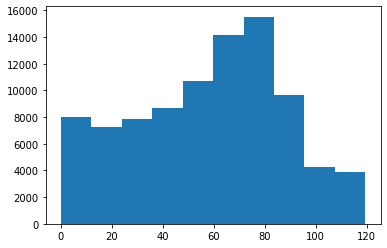

In [351]:
plt.hist(tX_train[:,1])

(array([3.9730e+04, 4.7566e+04, 2.3050e+03, 2.1900e+02, 6.2000e+01,
        2.1000e+01, 9.0000e+00, 8.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([2.000000e-03, 5.701330e+01, 1.140246e+02, 1.710359e+02,
        2.280472e+02, 2.850585e+02, 3.420698e+02, 3.990811e+02,
        4.560924e+02, 5.131037e+02, 5.701150e+02]),
 <a list of 10 Patch objects>)

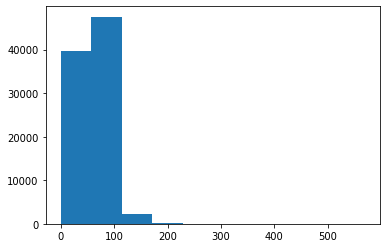

In [347]:
plt.hist(tX_train[:,1])

(array([8.8713e+04, 9.3700e+02, 1.6800e+02, 6.1000e+01, 1.8000e+01,
        1.3000e+01, 7.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 79.6475 , 128.69425, 177.741  , 226.78775, 275.8345 , 324.88125,
        373.928  , 422.97475, 472.0215 , 521.06825, 570.115  ]),
 <a list of 10 Patch objects>)

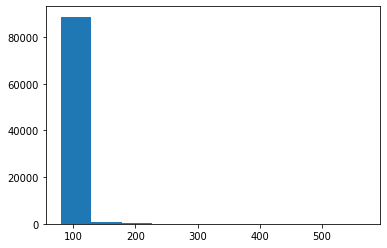

In [346]:
plt.hist(outliers[:,1])

In [ ]:

outliers = np.where(tX_train > q3*1.5, tX_train, q3)

robust = (tX_train - median)/IQR

In [374]:
median

array([ 1.113655e+02,  6.209700e+01,  7.551550e+01,  6.679000e+00,
        2.823000e+00,  6.679000e+00,  7.158600e+01,  1.318000e+00,
       -1.364000e+00,  2.932600e+01, -4.300000e-02, -4.500000e-02,
        3.896900e+01, -1.020000e-01,  8.500000e-02,  2.954500e+01,
       -4.650000e-02,  1.195000e+02])

In [373]:
robust

array([[ 0.54297176,  0.03696386,  0.31487712, ..., -0.34358583,
        -0.71485623, -0.44039925],
       [ 1.02221514,  0.4098936 ,  1.3150129 , ..., -0.08001483,
         0.78290735,  0.30674233],
       [ 1.55223294,  0.35940692,  1.87618243, ..., -0.04532251,
         0.20686901, -1.02860062],
       ...,
       [        nan,  1.31323568,  0.00764902, ...,  2.57724398,
         0.69952077,  0.54026239],
       [-0.74366781, -0.22370859, -0.36689649, ..., -0.41412414,
         0.20782748, -0.75832345],
       [-0.25294758, -0.98615814, -0.39067332, ...,  0.37444634,
        -0.27811502,  1.75883802]])

(array([3.9730e+04, 4.7566e+04, 2.3050e+03, 2.1900e+02, 6.2000e+01,
        2.1000e+01, 9.0000e+00, 8.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([2.000000e-03, 5.701330e+01, 1.140246e+02, 1.710359e+02,
        2.280472e+02, 2.850585e+02, 3.420698e+02, 3.990811e+02,
        4.560924e+02, 5.131037e+02, 5.701150e+02]),
 <a list of 10 Patch objects>)

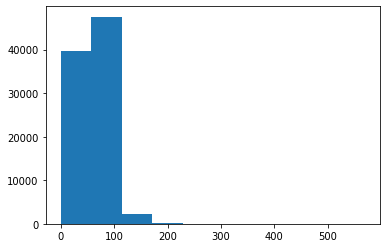

In [336]:
plt.hist(tX_train[:,1])

In [338]:
max(tX_train[:,1])

570.115

In [339]:
q1[1]

34.98225

In [340]:
median[1]

62.096999999999994

In [341]:
q3[1]

79.6475

In [343]:
IQR

array([47.05125, 44.66525, 33.1415 , 21.9265 ,  0.755  , 21.9265 ,
       23.96175,  0.759  ,  0.282  , 16.16175,  1.857  ,  3.142  ,
       17.139  ,  2.11   ,  3.147  , 24.2705 ,  3.13   , 68.50375])

In [316]:
robust = (tX_train - median)/IQR

print(robust.shape)

(89922, 18)


In [342]:
robust[:,1]

array([ 0.03696386,  0.4098936 ,  0.35940692, ...,  1.31323568,
       -0.22370859, -0.98615814])

(array([3.9730e+04, 4.7566e+04, 2.3050e+03, 2.1900e+02, 6.2000e+01,
        2.1000e+01, 9.0000e+00, 8.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-1.39023066, -0.11381779,  1.16259508,  2.43900795,  3.71542082,
         4.9918337 ,  6.26824657,  7.54465944,  8.82107231, 10.09748518,
        11.37389805]),
 <a list of 10 Patch objects>)

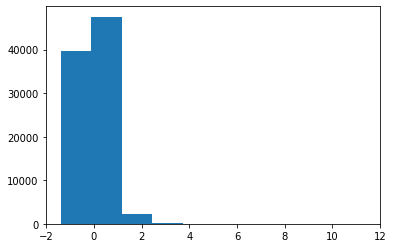

In [344]:
plt.hist(robust[:,1])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb15ecc8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb15eccf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb15ecc550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcb15ed6670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb15ed6970>],
 'means': []}

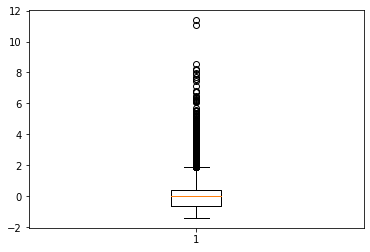

In [317]:
plt.boxplot(robust[:,1])

In [318]:
print(tX_train.shape)
print(q3.shape)

(89922, 18)
(18,)


In [319]:
a = np.array([[3,4,5],[6,7,8],[2,3,6],[1,1,-5]])
b = np.array([4,9,2])

print(a.shape)
print(b.shape)
print(a)
print(b)
np.where(a > b, a,b)

(4, 3)
(3,)
[[ 3  4  5]
 [ 6  7  8]
 [ 2  3  6]
 [ 1  1 -5]]
[4 9 2]


array([[4, 9, 5],
       [6, 9, 8],
       [4, 9, 6],
       [4, 9, 2]])

11.373898052736749


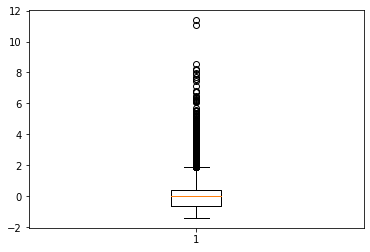

In [331]:
plt.boxplot(robust[:,1])

print(max(robust[:,1]))

In [324]:
q3

array([137.347  ,  79.6475 ,  94.13175,  24.1955 ,   3.095  ,  24.1955 ,
        85.24275,   1.727  ,  -1.122  ,  39.81175,   0.899  ,   1.563  ,
        49.019  ,   0.99   ,   1.624  ,  42.2545 ,   1.548  , 156.4295 ])

In [328]:
ind = np.where(robust > q3*1.5, robust, q3)


In [329]:
ind

array([[137.347  ,  79.6475 ,  94.13175, ...,  42.2545 ,   1.548  ,
        156.4295 ],
       [137.347  ,  79.6475 ,  94.13175, ...,  42.2545 ,   1.548  ,
        156.4295 ],
       [137.347  ,  79.6475 ,  94.13175, ...,  42.2545 ,   1.548  ,
        156.4295 ],
       ...,
       [137.347  ,  79.6475 ,  94.13175, ...,  42.2545 ,   1.548  ,
        156.4295 ],
       [137.347  ,  79.6475 ,  94.13175, ...,  42.2545 ,   1.548  ,
        156.4295 ],
       [137.347  ,  79.6475 ,  94.13175, ...,  42.2545 ,   1.548  ,
        156.4295 ]])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb15e079a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb15e130a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb15e07640>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcb15e13760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb15e13a60>],
 'means': []}

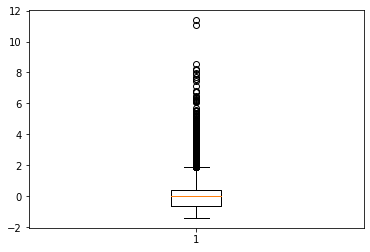

In [327]:
plt.boxplot(ind[:,1])

In [303]:
ind[:,1]

array([79.6475, 79.6475, 79.6475, ..., 79.6475, 79.6475, 79.6475])

In [304]:
q3

array([137.347  ,  79.6475 ,  94.13175,  24.1955 ,       nan,       nan,
             nan,   3.095  ,  24.1955 ,  85.24275,   1.727  ,  -1.122  ,
             nan,  39.81175,   0.899  ,   1.563  ,  49.019  ,   0.99   ,
         1.624  ,  42.2545 ,   1.548  , 156.4295 ,       nan,       nan,
             nan,       nan,       nan,       nan])

In [305]:
robust[:,1]

array([ 0.03696386,  0.4098936 ,  0.35940692, ...,  1.31323568,
       -0.22370859, -0.98615814])

### 

In [200]:
copy_robust = np.copy(robust)

In [201]:
copy_robust

array([[ 0.54297176,  0.03696386,  0.31487712, ...,         nan,
                nan,         nan],
       [ 1.02221514,  0.4098936 ,  1.3150129 , ...,         nan,
                nan,         nan],
       [ 1.55223294,  0.35940692,  1.87618243, ...,         nan,
                nan,         nan],
       ...,
       [        nan,  1.31323568,  0.00764902, ...,         nan,
                nan,         nan],
       [-0.74366781, -0.22370859, -0.36689649, ...,         nan,
                nan,         nan],
       [-0.25294758, -0.98615814, -0.39067332, ...,         nan,
                nan,         nan]])

In [225]:
tX.shape

(89922, 28)

In [223]:
a = np.array([[ 0.93230948,         np.nan , 0.47773439 , 0.76998063],
 [ 0.94460779,  0.87882456,  0.79615838 , 0.56282885],
 [ 0.94272934 , 0.48615268 , 0.06196785   ,      np.nan]])

a.shape

(3, 4)

In [228]:
col_mean = np.nanmean(a, axis=0)
print(col_mean)
inds = np.where(np.isnan(a))
inds

[0.9398822  0.68248862 0.44528687 0.66640474]


(array([0, 2]), array([1, 3]))

In [245]:
inds = np.where(abs(robust) > abs(q3*1.5))
copy_robust[inds] = np.take(q3, ind[1])

In [250]:
abs(robust)>0.5

array([[ True, False, False, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcafc0d17c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcafc0d1e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcafc0d1460>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcafc0dd580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcafc0dd880>],
 'means': []}

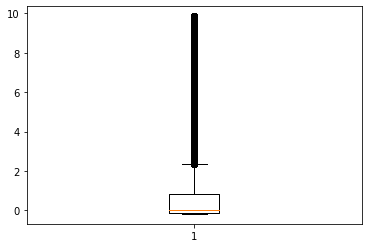

In [246]:
plt.boxplot(robust[:,11])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcaffea7b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcaffeb1250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcaffea77f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcaffeb1910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcaffeb1c10>],
 'means': []}

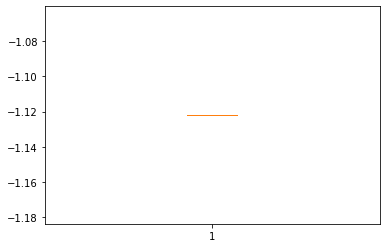

In [247]:
plt.boxplot(copy_robust[:,11])

In [239]:
copy_robust[:,11]

array([-1.122, -1.122, -1.122, ..., -1.122, -1.122, -1.122])

In [242]:
q3[11]*1.5

-1.6830000000000003

In [236]:
copy_robust[ind]

array([-1.122, -1.122, -1.122, ..., -1.122, -1.122, -1.122])

In [210]:
robust[ind]

array([-0.04255319, -0.08156028, -0.04964539, ..., -0.16312057,
       -0.09929078,  2.78368794])

In [211]:
print(np.nanmedian(robust))
print(np.nanmedian(copy_robust))

0.0
-0.05401844532279333


In [214]:
print(np.nanmedian(robust[:,1]))
print(np.nanmedian(copy_robust[:,1]))

7.953978187896782e-17
7.953978187896782e-17


89922

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcafb8fb100>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcafb8fb7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb02d2cd60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcafb8fbe80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcafb9071c0>],
 'means': []}

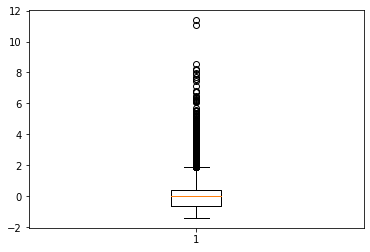

In [213]:
plt.boxplot(copy_robust[:,1])

In [106]:
tX = (tX_train - col_mean)/col_std

# Replaces missings with median
inds = np.where(np.isnan(tX))
tX[inds] = np.take(col_mean, inds[1])

# Creates dummies for imputed values
tX_imputed = np.zeros((tX.shape[0],tX.shape[1]))
array_one = np.ones(tX.shape[1])
tX_imputed[inds] = np.take(array_one, inds[1])

# Concatenates imputed dummies with variables
tX_clean = np.hstack((tX, tX_imputed))

In [108]:
tX_clean.shape

(89922, 56)

In [5]:
# Simple division
# TODO: Cross validation

X_train, X_test, y_train, y_test = split_data(tX, y, 0.1, myseed=1)
X_train, X_test = preprocessing(X_train, X_test)


ValueError: operands could not be broadcast together with shapes (25000,30) (25000,) 

In [ ]:
X_train_processed.head()

In [ ]:
X_train_processed.DER_mass_MMC.hist()

In [ ]:
col_names = ['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']


col_names_imputed = ["imp_" + x  for x in col_names]
all_col_names = col_names + col_names_imputed

In [ ]:
import pandas as pd
X_train_processed = pd.DataFrame(X_train, columns = all_col_names)

In [ ]:
X_train_processed.head()

In [ ]:
X_train_processed.isna().sum()

In [6]:
X_train_processed.DER_mass_MMC.hist(bins=100)

NameError: name 'X_train_processed' is not defined

In [7]:
pd.DataFrame(y_train)

NameError: name 'pd' is not defined

In [41]:
X_train_processed.DER_mass_MMC.corr(pd.DataFrame(y_train, columns = ['outcome'])['outcome'])

-0.23537240984924382

In [ ]:
X_train_processed.DER_mass_MMC.hist(bins=100, )

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Baseline

In [15]:
clf = LogisticRegression(max_iter = 700)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

        -1.0       0.78      0.86      0.82    147877
         1.0       0.67      0.54      0.60     77123

    accuracy                           0.75    225000
   macro avg       0.73      0.70      0.71    225000
weighted avg       0.74      0.75      0.74    225000



In [48]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.85      0.90      0.88    147877
         1.0       0.79      0.69      0.74     77123

    accuracy                           0.83    225000
   macro avg       0.82      0.80      0.81    225000
weighted avg       0.83      0.83      0.83    225000



In [55]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.85      0.91      0.88    147877
         1.0       0.79      0.69      0.74     77123

    accuracy                           0.83    225000
   macro avg       0.82      0.80      0.81    225000
weighted avg       0.83      0.83      0.83    225000



In [ ]:
X_train_processed = pd.DataFrame(X_train, columns = all_col_names)

In [53]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.159013)
2. feature 1 (0.090632)
3. feature 2 (0.075695)
4. feature 13 (0.055844)
5. feature 11 (0.054233)
6. feature 10 (0.050245)
7. feature 7 (0.044399)
8. feature 19 (0.041823)
9. feature 3 (0.033305)
10. feature 9 (0.030103)
11. feature 16 (0.029774)
12. feature 8 (0.028758)
13. feature 21 (0.026657)
14. feature 17 (0.026536)
15. feature 14 (0.026445)
16. feature 18 (0.024688)
17. feature 15 (0.024665)
18. feature 20 (0.024364)
19. feature 4 (0.020476)
20. feature 24 (0.020078)
21. feature 5 (0.017205)
22. feature 23 (0.016715)
23. feature 29 (0.016231)
24. feature 25 (0.015426)
25. feature 12 (0.015012)
26. feature 6 (0.008152)
27. feature 26 (0.006608)
28. feature 28 (0.006558)
29. feature 27 (0.006269)
30. feature 22 (0.004091)


In [50]:
clf.feature_importances_ 

array([0.15901319, 0.09063204, 0.07569474, 0.0333051 , 0.02047639,
       0.0172051 , 0.00815237, 0.04439898, 0.02875834, 0.03010286,
       0.05024471, 0.05423269, 0.01501216, 0.05584429, 0.02644499,
       0.02466486, 0.02977358, 0.02653616, 0.02468838, 0.04182306,
       0.02436392, 0.02665722, 0.00409108, 0.01671498, 0.02007808,
       0.01542594, 0.00660783, 0.00626881, 0.00655754, 0.01623061])

In [18]:
clf = LogisticRegression(max_iter = 700)
parameters = {'penalty':['l1','l2','elasticnet'], 
              'C':[0.001, 0.1, 0.5, 1, 2, 10],
             'l1_ratio':[0.25,0.5,0.75]}
gsc = GridSearchCV(clf, parameters,
                    scoring = 'f1', 
                    cv = 5, 
                    verbose = 1,
                    n_jobs = -1)

gsc.fit(tX, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 13.4min finished
/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_r

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=700), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 0.5, 1, 2, 10],
                         'l1_ratio': [0.25, 0.5, 0.75],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1', verbose=1)

In [21]:
best_params =gsc.best_params_
best_params

{'C': 0.1, 'l1_ratio': 0.25, 'penalty': 'l2'}

In [22]:
gsc.best_score_

0.5694741426405251

In [23]:
clf = LogisticRegression(max_iter = 700, C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.78      0.87      0.82    147877
         1.0       0.67      0.53      0.59     77123

    accuracy                           0.75    225000
   macro avg       0.73      0.70      0.71    225000
weighted avg       0.74      0.75      0.74    225000



In [46]:
ws = []
losses = []

#Gridsearch for lambda_
w = np.zeros(X_train.shape[1])
gammas = [0.01,0.1,0.2]
lambdas_ = [0.0001,0.001,0.01, 0.05,0.1, 0.2, 0.5, 1]
for l in lambdas_:
    for g in gammas:
        w, loss = reg_logistic_regression(y_train, X_train, l,w,100,g)
        ws.append(w)
        losses.append(loss)


Current iteration=0, loss=17328.67951399868


./../src/implementations.py:50: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-t))
./../src/implementations.py:56: RuntimeWarning: divide by zero encountered in log
  loss = y.T.dot(np.log(pred)) + (1 - y).T.dot(np.log(1 - pred))


Current iteration=0, loss=nan
Current iteration=0, loss=nan
Current iteration=0, loss=nan
Current iteration=0, loss=nan
Current iteration=0, loss=nan
Current iteration=0, loss=nan
Current iteration=0, loss=nan
Current iteration=0, loss=nan
Current iteration=0, loss=nan
Current iteration=0, loss=nan
Current iteration=0, loss=nan
Current iteration=0, loss=nan
Current iteration=0, loss=nan
Current iteration=0, loss=nan
Current iteration=0, loss=nan
Current iteration=0, loss=nan


KeyboardInterrupt: 

In [56]:
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

# Treat test day the same way we treat traim
_, tX_test = preprocessing(tX, tX_test)

weights = ws[0]
y_pred = predict_labels(weights, tX_test,1)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

## Missing
* Cross validation for hyperparameters 